In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import math 

In [37]:
PVS_1_gps_mpu_left_df = pd.read_csv("PVS 1\dataset_gps_mpu_left.csv")
PVS_1_gps_mpu_right_df = pd.read_csv("PVS 1\dataset_gps_mpu_right.csv")
PVS_1_gps_df = pd.read_csv("PVS 1\dataset_gps.csv")

PVS_1_gps_mpu_left_df.head()
PVS_1_gps_mpu_right_df.head()
PVS_1_gps_df.head()


,timestamp,latitude,longitude,elevation,accuracy,bearing,speed_meters_per_second,satellites,provider,hdop,vdop,pdop,geoidheight,ageofdgpsdata,dgpsid,activity,battery,annotation,distance_meters,elapsed_time_seconds
0,1.577219e+09,-27.717812,-51.098895,948.770836,24.0,159.73294,0.053275,0,gps,0.8,1.7,1.9,3.6,NaN,NaN,NaN,87,NaN,0.000000,0.0
1,1.577219e+09,-27.717818,-51.098840,970.378820,12.0,NaN,0.000000,12,gps,0.8,1.5,1.7,3.6,NaN,NaN,NaN,87,NaN,5.442520,2.0
2,1.577219e+09,-27.717832,-51.098871,989.374267,4.0,NaN,0.000000,13,gps,0.8,1.6,1.8,3.6,NaN,NaN,NaN,86,NaN,3.404871,5.0
3,1.577219e+09,-27.717833,-51.098867,988.439139,4.0,NaN,0.000000,14,gps,0.8,1.7,1.9,3.6,NaN,NaN,NaN,86,NaN,0.421733,1.0
4,1.577219e+09,-27.717835,-51.098873,987.668730,4.0,NaN,0.000000,14,gps,0.8,1.6,1.8,3.6,NaN,NaN,NaN,86,NaN,0.574281,1.0


In [38]:
PVS_1_gps_df.shape

PVS_1_gps_df.tail()

,timestamp,latitude,longitude,elevation,accuracy,bearing,speed_meters_per_second,satellites,provider,hdop,vdop,pdop,geoidheight,ageofdgpsdata,dgpsid,activity,battery,annotation,distance_meters,elapsed_time_seconds
1462,1.577220e+09,-27.717778,-51.099069,980.865571,4.0,130.51640,0.017391,16,gps,0.8,1.3,1.5,3.6,NaN,NaN,NaN,81,NaN,0.176010,1.0
1463,1.577220e+09,-27.717773,-51.099072,981.469505,6.0,130.51602,0.033592,16,gps,0.8,1.3,1.5,3.6,NaN,NaN,NaN,81,NaN,0.644347,1.0
1464,1.577220e+09,-27.717773,-51.099078,979.980588,6.0,194.52164,0.761983,16,gps,0.9,1.3,1.5,3.6,NaN,NaN,NaN,81,NaN,0.614420,1.0
1465,1.577220e+09,-27.717777,-51.099073,979.903556,6.0,195.58694,0.054153,16,gps,0.8,1.3,1.5,3.6,NaN,NaN,NaN,81,NaN,0.645030,1.0
1466,1.577220e+09,-27.717777,-51.099070,979.779629,6.0,195.58623,0.005715,16,gps,0.8,1.3,1.5,3.6,NaN,NaN,NaN,81,NaN,0.301293,1.0


In [39]:
PVS_1_gps_mpu_left_df.shape

PVS_1_gps_mpu_left_df.tail()

,timestamp,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,acc_x_above_suspension,acc_y_above_suspension,acc_z_above_suspension,acc_x_below_suspension,acc_y_below_suspension,acc_z_below_suspension,...,mag_x_above_suspension,mag_y_above_suspension,mag_z_above_suspension,temp_dashboard,temp_above_suspension,temp_below_suspension,timestamp_gps,latitude,longitude,speed
144031,1.577220e+09,-0.527921,-0.322918,9.583271,-0.331976,-0.185200,9.528076,-0.704237,-0.054839,9.753122,...,74.200691,-42.673250,-16.673019,33.699554,35.568545,32.237907,1.577220e+09,-27.717777,-51.09907,0.005715
144032,1.577220e+09,-0.663194,-0.575506,9.433633,-0.458869,-0.413847,10.223591,-0.748530,-0.212856,9.526870,...,74.648657,-42.554548,-20.489734,33.699554,35.472699,32.309791,1.577220e+09,-27.717777,-51.09907,0.005715
144033,1.577220e+09,-0.375890,-0.245106,9.957964,-0.104527,-0.047534,9.687290,-0.719800,-0.150607,9.933885,...,73.997070,-39.705708,-18.347017,33.555785,35.472699,32.070177,1.577220e+09,-27.717777,-51.09907,0.005715
144034,1.577220e+09,-0.385466,-0.091877,9.840648,-0.530695,-0.452154,8.940299,-0.705434,-0.378056,10.003317,...,73.997070,-39.705708,-17.007819,33.699554,35.520622,32.261868,1.577220e+09,-27.717777,-51.09907,0.005715
144035,1.577220e+09,-0.575805,-0.502483,9.457575,-0.366692,-0.286954,9.993748,-0.754516,-0.168563,9.739954,...,74.078518,-43.029355,-17.007819,33.843322,35.472699,32.166023,1.577220e+09,-27.717777,-51.09907,0.005715


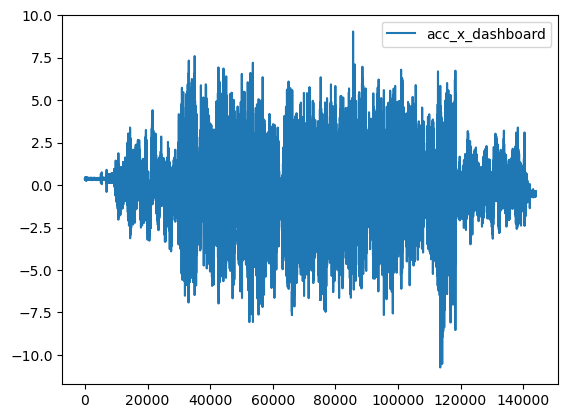

In [40]:
PVS_1_gps_mpu_left_df.plot(y=['acc_x_dashboard'])
plt.show()

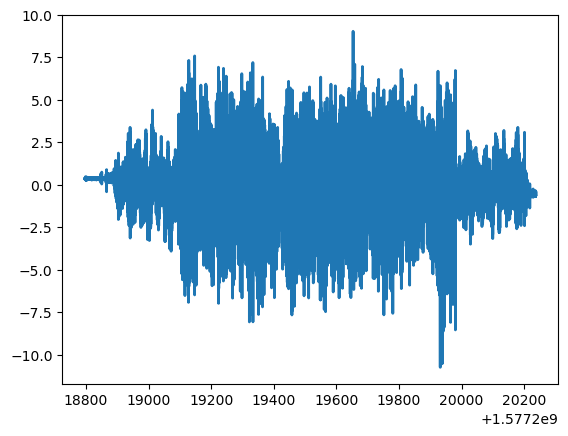

In [41]:
x = PVS_1_gps_mpu_left_df['timestamp']
y = PVS_1_gps_mpu_left_df['acc_x_dashboard']

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.show()

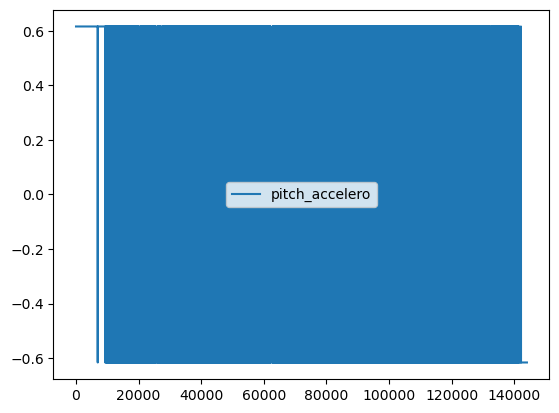

In [42]:
PVS_1_gps_mpu_left_df['pitch_accelero'] = np.arctan2(PVS_1_gps_mpu_left_df['acc_x_dashboard'],np.sqrt(PVS_1_gps_mpu_left_df['acc_x_dashboard'] ** 2 + PVS_1_gps_mpu_left_df['acc_x_dashboard'] ** 2))

PVS_1_gps_mpu_left_df.plot(y=['pitch_accelero'])
plt.show()

In [43]:
def accel_to_position_func(df, acc):

    acc_split_ls = acc.split("_")

    print(x[0])

    df['timestamp_shifted'] = df['timestamp'].shift()

    df['time_step'] =  df['timestamp'] - df['timestamp_shifted']

    df[ acc + '_shifted'] = df[acc].shift()

    df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]] = df['time_step'] * df[ acc + '_shifted'] + ((df[acc] - df[ acc + '_shifted']) * df['time_step'])/2

    df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_shifted'] = df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]].shift()

    df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2]] = df['time_step'] * df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_shifted'] + ((df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]] - df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_shifted']) * df['time_step'])/2



In [44]:
len(PVS_1_gps_mpu_left_df)


144036

In [45]:
def accel_to_position_func(df, acc):

    acc_split_ls = acc.split("_")

    print(x[0])

    df['timestamp_shifted'] = df['timestamp'].shift()

    df['time_step'] =  df['timestamp'] - df['timestamp_shifted']

    df[ acc + '_shifted'] = df[acc].shift()

    df['delta_vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]] = df['time_step'] * df[ acc + '_shifted'] + ((df[acc] - df[ acc + '_shifted']) * df['time_step'])/2

    df['delta_vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_shifted'] = df['delta_vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]].shift()

    df = df.fillna(0)

    #df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2]] = df['time_step'] * df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_shifted'] + ((df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]] - df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_shifted']) * df['time_step'])/2

    df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]] = 0

    df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2]] = 0

    for i in range(len(PVS_1_gps_mpu_left_df)):

        if i != len(PVS_1_gps_mpu_left_df)-1: 

            df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i+1] = df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i] + (df[acc][i] + (df[acc][i+1] - df[acc][i])/2) * df['time_step'][i+1]

            df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i+1] = df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i] + (df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i] + (df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i+1] - df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i])/2) * df['time_step'][i+1] 

    return df            

In [46]:
PVS_1_gps_mpu_left_df = accel_to_position_func(PVS_1_gps_mpu_left_df, 'acc_x_dashboard')

PVS_1_gps_mpu_left_df = accel_to_position_func(PVS_1_gps_mpu_left_df, 'acc_y_dashboard')

# accel_to_position_func(PVS_1_gps_mpu_left_df, 'acc_z_dashboard')

1577218796.56


C:\Users\tucha\AppData\Local\Temp\ipykernel_29756\2042862812.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i+1] = df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i] + (df[acc][i] + (df[acc][i+1] - df[acc][i])/2) * df['time_step'][i+1]
C:\Users\tucha\AppData\Local\Temp\ipykernel_29756\2042862812.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i+1] = df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i] + (df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i] + (df['vel_' + acc_split_ls[1] + '_' 

1577218796.56


C:\Users\tucha\AppData\Local\Temp\ipykernel_29756\2042862812.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i+1] = df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i] + (df[acc][i] + (df[acc][i+1] - df[acc][i])/2) * df['time_step'][i+1]
C:\Users\tucha\AppData\Local\Temp\ipykernel_29756\2042862812.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i+1] = df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i] + (df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]][i] + (df['vel_' + acc_split_ls[1] + '_' 

In [47]:
def measure(lat1, lon1, lat2, lon2):  #generally used geo measurement function
    R = 6378.137 #Radius of earth in KM
    dLat = lat2 * np.pi / 180 - lat1 * np.pi / 180
    dLon = lon2 * np.pi / 180 - lon1 * np.pi / 180
    a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(lat1 * np.pi / 180) * np.cos(lat2 * np.pi / 180) * np.sin(dLon/2) * np.sin(dLon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d * 1000; #meters


In [48]:
PVS_1_gps_mpu_left_df['latitude_shifted'] = PVS_1_gps_mpu_left_df['latitude'].shift()
PVS_1_gps_mpu_left_df['longitude_shifted'] = PVS_1_gps_mpu_left_df['longitude'].shift()

In [49]:
PVS_1_gps_mpu_left_df['dis_gps'] = measure(PVS_1_gps_mpu_left_df['latitude'], PVS_1_gps_mpu_left_df['longitude'], PVS_1_gps_mpu_left_df['latitude_shifted'], PVS_1_gps_mpu_left_df['longitude_shifted'])

In [50]:
PVS_1_gps_mpu_left_df = PVS_1_gps_mpu_left_df.fillna(0)

PVS_1_gps_mpu_left_df['sum'] = 0

PVS_1_gps_mpu_left_df['sum'].loc[144] = PVS_1_gps_mpu_left_df['dis_gps'].loc[0:144].sum()

C:\Users\tucha\AppData\Local\Temp\ipykernel_29756\3556159021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PVS_1_gps_mpu_left_df['sum'].loc[144] = PVS_1_gps_mpu_left_df['dis_gps'].loc[0:144].sum()


In [51]:
gps_update_index_ls = []
gps_update_point_between_ls = []

gps_update = PVS_1_gps_mpu_left_df['dis_gps'].loc[PVS_1_gps_mpu_left_df['dis_gps'] != 0]

gps_update_index_ls = list(gps_update.index)

gps_update_index_ls.insert(0, 0)

PVS_1_gps_mpu_left_df['dis_gps_sum'] = 0

for i in range(len(gps_update_index_ls)):
     if i != len(gps_update_index_ls)-1: #out of range
        PVS_1_gps_mpu_left_df['dis_gps_sum'][gps_update_index_ls[i+1]] = PVS_1_gps_mpu_left_df['dis_gps_sum'][gps_update_index_ls[i]] + PVS_1_gps_mpu_left_df['dis_gps'][gps_update_index_ls[i+1]]
        gps_update_point_between_ls.append(gps_update_index_ls[i+1] - gps_update_index_ls[i])

PVS_1_gps_mpu_left_df['pos_distance_dashboard_sum'] = np.sqrt(PVS_1_gps_mpu_left_df['pos_x_dashboard'] ** 2 + PVS_1_gps_mpu_left_df['pos_y_dashboard'] ** 2)

C:\Users\tucha\AppData\Local\Temp\ipykernel_29756\636832613.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PVS_1_gps_mpu_left_df['dis_gps_sum'][gps_update_index_ls[i+1]] = PVS_1_gps_mpu_left_df['dis_gps_sum'][gps_update_index_ls[i]] + PVS_1_gps_mpu_left_df['dis_gps'][gps_update_index_ls[i+1]]


In [52]:
# PVS_1_gps_mpu_left_df['pos_x_dashboard_sum'] = 0
# PVS_1_gps_mpu_left_df['pos_y_dashboard_sum'] = 0

# PVS_1_gps_mpu_left_df['pos_x_dashboard_sum'][144] = PVS_1_gps_mpu_left_df['pos_x_dashboard'].loc[0:144].sum()
# PVS_1_gps_mpu_left_df['pos_y_dashboard_sum'][144] = PVS_1_gps_mpu_left_df['pos_y_dashboard'].loc[0:144].sum()

In [53]:
gps_update_index_ls = []

gps_update = PVS_1_gps_mpu_left_df['dis_gps'].loc[PVS_1_gps_mpu_left_df['dis_gps'] != 0]

PVS_1_gps_mpu_left_df['pos_x_dashboard_sum'] = 0
PVS_1_gps_mpu_left_df['pos_y_dashboard_sum'] = 0

gps_update_index_ls = list(gps_update.index)

gps_update_index_ls.insert(0, 0)

for i in range(len(gps_update_index_ls)):
     if i != len(gps_update_index_ls)-1: #out of range
        PVS_1_gps_mpu_left_df['pos_x_dashboard_sum'][gps_update_index_ls[i+1]] = PVS_1_gps_mpu_left_df['pos_x_dashboard'].loc[gps_update_index_ls[i]:gps_update_index_ls[i+1]].sum()
        PVS_1_gps_mpu_left_df['pos_y_dashboard_sum'][gps_update_index_ls[i+1]] = PVS_1_gps_mpu_left_df['pos_y_dashboard'].loc[gps_update_index_ls[i]:gps_update_index_ls[i+1]].sum()

PVS_1_gps_mpu_left_df['pos_distance_dashboard_sum'] = np.sqrt(PVS_1_gps_mpu_left_df['pos_x_dashboard_sum'] ** 2 + PVS_1_gps_mpu_left_df['pos_y_dashboard_sum'] ** 2)

C:\Users\tucha\AppData\Local\Temp\ipykernel_29756\2445630633.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PVS_1_gps_mpu_left_df['pos_x_dashboard_sum'][gps_update_index_ls[i+1]] = PVS_1_gps_mpu_left_df['pos_x_dashboard'].loc[gps_update_index_ls[i]:gps_update_index_ls[i+1]].sum()
C:\Users\tucha\AppData\Local\Temp\ipykernel_29756\2445630633.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PVS_1_gps_mpu_left_df['pos_y_dashboard_sum'][gps_update_index_ls[i+1]] = PVS_1_gps_mpu_left_df['pos_y_dashboard'].loc[gps_update_index_ls[i]:gps_update_index_ls[i+1]].sum()


In [54]:
def lat_long_to_x_y(df):
    R = 6378.137

    x_initial = R * np.deg2rad(df['longitude'][0]) * math.cos(np.deg2rad(df['latitude'][0])) 
    y_initial = R * np.deg2rad(df['latitude'][0])

    print(x_initial)
    print(y_initial)

    df['pos_x_gps_projection'] = R * np.deg2rad(df['longitude']) * np.cos(np.deg2rad(df['latitude']))*1000
    df['pos_y_gps_projection'] = R * np.deg2rad(df['latitude'])*1000

    df['pos_x_gps_projection_set_zero'] = (R * np.deg2rad(df['longitude']) * np.cos(np.deg2rad(df['latitude'])) - x_initial)*1000
    df['pos_y_gps_projection_set_zero'] = (R * np.deg2rad(df['latitude']) - y_initial)*1000

In [55]:
lat_long_to_x_y(PVS_1_gps_mpu_left_df)

-5035.560676897081
-3085.5359412212756


In [56]:
PVS_1_gps_mpu_left_df['dis_gps'].loc[PVS_1_gps_mpu_left_df['dis_gps'] != 0]

144       0.045317
244       0.004133
444       0.027946
544       0.030817
644       0.019029
            ...   
141844    0.175884
141944    0.646490
142044    0.614005
142144    0.645867
142244    0.301121
Name: dis_gps, Length: 1391, dtype: float64

In [57]:
def lerp(start, end, t):
    """
    Linear interpolation function.
    """
    return (1 - t) * start + t * end

def generate_points_on_line(start_point_x, start_point_y, end_point_x, end_point_y, num_points):
    """
    Generate points along a line segment.
    """
    x = []
    y = []
    for i in range(num_points):
        t = i / (num_points - 1)  # t ranges from 0 to 1
        x.append(lerp(start_point_x, end_point_x, t))
        y.append(lerp(start_point_y, end_point_y, t))
    return x, y

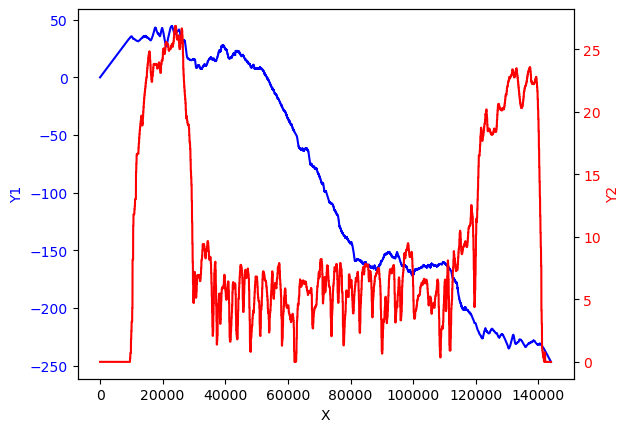

In [58]:
fig, ax1 = plt.subplots()

# พล็อตค่าในคอลัม 'Y1' บนแกน Y แรก
ax1.plot( PVS_1_gps_mpu_left_df['vel_x_dashboard'], color='b', label='Y1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y1', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# สร้างแกน Y ที่สองแยกจากแกน Y หลัก
ax2 = ax1.twinx()

# พล็อตค่าในคอลัม 'Y2' บนแกน Y ที่สอง
ax2.plot( PVS_1_gps_mpu_left_df['speed'], color='r', label='Y2')
ax2.set_ylabel('Y2', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# แสดงกราฟ
plt.show()

In [59]:
def accel_to_position_func(df, acc):

    acc_split_ls = acc.split("_")

    df['timestamp_shifted'] = df['timestamp'].shift()

    df['time_step'] =  df['timestamp'] - df['timestamp_shifted']

    df[ acc + '_shifted'] = df[acc].shift()

    df['delta_vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]] = df['time_step'] * df[ acc + '_shifted'] + ((df[acc] - df[ acc + '_shifted']) * df['time_step'])/2

    df['delta_vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_shifted'] = df['delta_vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]].shift()

    df = df.fillna(0)

    #df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2]] = df['time_step'] * df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_shifted'] + ((df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2]] - df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_shifted']) * df['time_step'])/2

    df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'] = 0

    df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'] = 0

    df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_integration'] = 0

    df['orientation_z_' + acc_split_ls[2] + '_fusion'] = 0

    for i in range(len(PVS_1_gps_mpu_left_df)):

        if i != len(PVS_1_gps_mpu_left_df)-1: 

            if i in gps_update_index_ls:
                df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i] = df['pos_' + acc_split_ls[1] + '_gps_projection_set_zero'][i]

            df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i+1] = df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i] + (df[acc][i] + (df[acc][i+1] - df[acc][i])/2) * df['time_step'][i+1]

            df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_integration'][i+1] = df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i] + (df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i] + (df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i+1] - df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i])/2) * df['time_step'][i+1]

            if acc_split_ls[1] == 'x':            
                df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i+1] = df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i] + (df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i] + (df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i+1] - df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i])/2) * df['time_step'][i+1] * math.cos(df['orientation_z_' + acc_split_ls[2] + '_fusion'][i] + np.deg2rad(df['gyro_z_' + acc_split_ls[2]][i+1]) * df['time_step'][i+1])

            elif acc_split_ls[1] == 'y':
                df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i+1] = df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i] + (df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i] + (df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i+1] - df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i])/2) * df['time_step'][i+1] * math.sin(df['orientation_z_' + acc_split_ls[2] + '_fusion'][i] + np.deg2rad(df['gyro_z_' + acc_split_ls[2]][i+1]) * df['time_step'][i+1])
            
            df['orientation_z_' + acc_split_ls[2] + '_fusion'][i+1] = df['orientation_z_' + acc_split_ls[2] + '_fusion'][i] + np.deg2rad(df['gyro_z_' + acc_split_ls[2]][i+1]) * df['time_step'][i+1]

    return df

In [60]:
# deg_check = np.cos(PVS_1_gps_mpu_left_df['orientation_z_dashboard'] + np.deg2rad(PVS_1_gps_mpu_left_df['gyro_z_dashboard']))


In [61]:
PVS_1_gps_mpu_left_df = accel_to_position_func(PVS_1_gps_mpu_left_df, 'acc_x_dashboard')

PVS_1_gps_mpu_left_df = accel_to_position_func(PVS_1_gps_mpu_left_df, 'acc_y_dashboard')

C:\Users\tucha\AppData\Local\Temp\ipykernel_29756\106043828.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i] = df['pos_' + acc_split_ls[1] + '_gps_projection_set_zero'][i]
C:\Users\tucha\AppData\Local\Temp\ipykernel_29756\106043828.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i+1] = df['vel_' + acc_split_ls[1] + '_' + acc_split_ls[2] + '_fusion'][i] + (df[acc][i] + (df[acc][i+1] - df[acc][i])/2) * df['time_step'][i+1]
C:\Users\tucha\AppData\Local\Temp\ipykernel_29756\106043828

In [62]:
time_stamp_check = list(PVS_1_gps_mpu_left_df['timestamp'][PVS_1_gps_mpu_left_df['timestamp'] > PVS_1_gps_df['timestamp'][len(PVS_1_gps_df)-1]].index)

PVS_1_gps_mpu_left_df = PVS_1_gps_mpu_left_df.drop(labels= time_stamp_check, axis=0)

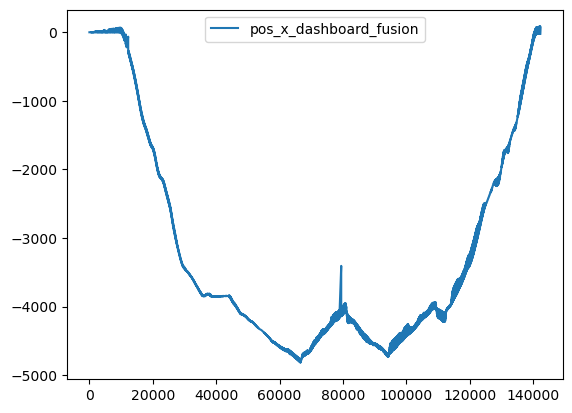

<Figure size 50000x100000 with 0 Axes>

In [63]:
PVS_1_gps_mpu_left_df.plot(y=['pos_x_dashboard_fusion'])
plt.figure(figsize=(500,1000))
plt.show()

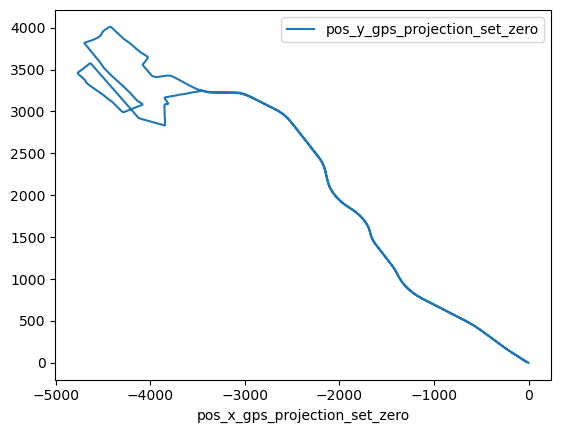

<Figure size 50000x100000 with 0 Axes>

In [64]:
PVS_1_gps_mpu_left_df.plot(x='pos_x_gps_projection_set_zero',y='pos_y_gps_projection_set_zero')
plt.figure(figsize=(500,1000))
plt.show()

C:\Users\tucha\AppData\Local\Temp\ipykernel_29756\2763599742.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PVS_1_gps_mpu_left_df['pos_x_gps_projection_linear'].loc[gps_update_index_ls[i]:gps_update_index_ls[i+1]-1] = x
C:\Users\tucha\AppData\Local\Temp\ipykernel_29756\2763599742.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PVS_1_gps_mpu_left_df['pos_y_gps_projection_linear'].loc[gps_update_index_ls[i]:gps_update_index_ls[i+1]-1] = y


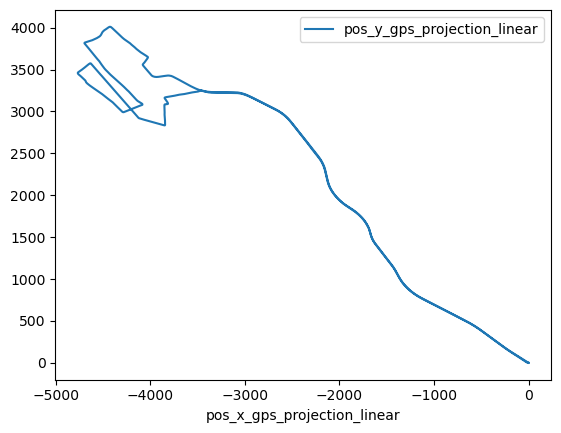

<Figure size 50000x100000 with 0 Axes>

In [65]:
PVS_1_gps_mpu_left_df['pos_x_gps_projection_linear'] = 0
PVS_1_gps_mpu_left_df['pos_y_gps_projection_linear'] = 0

for i in range(len(gps_update_index_ls)):

#     # m = (PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][i+1] - PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][i]) / (PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][i+1] - PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][i])
#     # c = PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][i+1] - PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][i+1] * m

    if i != len(gps_update_index_ls)-1: #out of range
        x, y = generate_points_on_line(PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][gps_update_index_ls[i]], PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][gps_update_index_ls[i]], PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero'][gps_update_index_ls[i+1]], PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero'][gps_update_index_ls[i+1]], gps_update_point_between_ls[i])
        PVS_1_gps_mpu_left_df['pos_x_gps_projection_linear'].loc[gps_update_index_ls[i]:gps_update_index_ls[i+1]-1] = x
        PVS_1_gps_mpu_left_df['pos_y_gps_projection_linear'].loc[gps_update_index_ls[i]:gps_update_index_ls[i+1]-1] = y
    
PVS_1_gps_mpu_left_df.plot(x='pos_x_gps_projection_linear',y='pos_y_gps_projection_linear')
plt.figure(figsize=(500,1000))
plt.show()

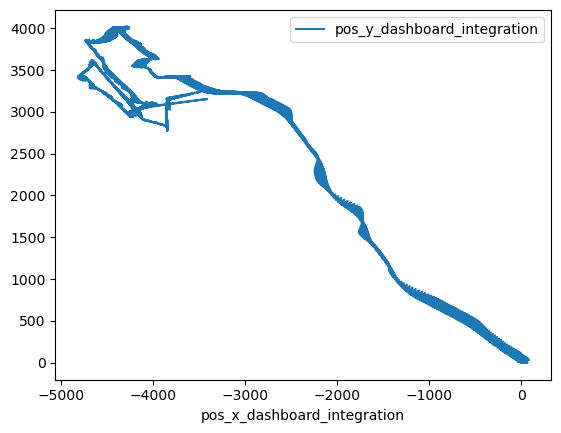

<Figure size 50000x100000 with 0 Axes>

In [66]:
PVS_1_gps_mpu_left_df.plot(x='pos_x_dashboard_integration',y='pos_y_dashboard_integration')
plt.figure(figsize=(500,1000))
plt.show()

In [67]:
# PVS_1_gps_mpu_left_df.plot(y='orientation_z_dashboard')
# plt.figure(figsize=(500,1000))
# plt.show()

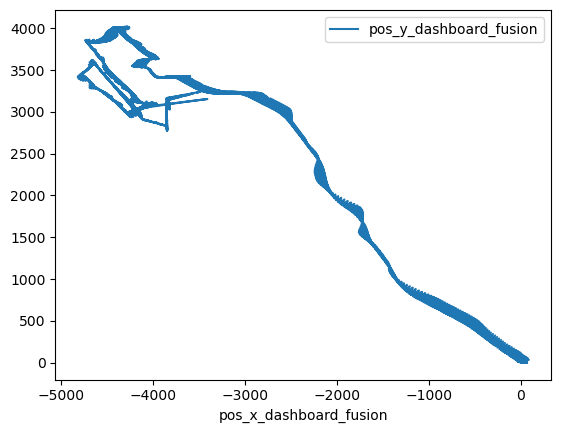

<Figure size 50000x100000 with 0 Axes>

In [68]:
PVS_1_gps_mpu_left_df.plot(x='pos_x_dashboard_fusion',y='pos_y_dashboard_fusion')
plt.figure(figsize=(500,1000))
plt.show()

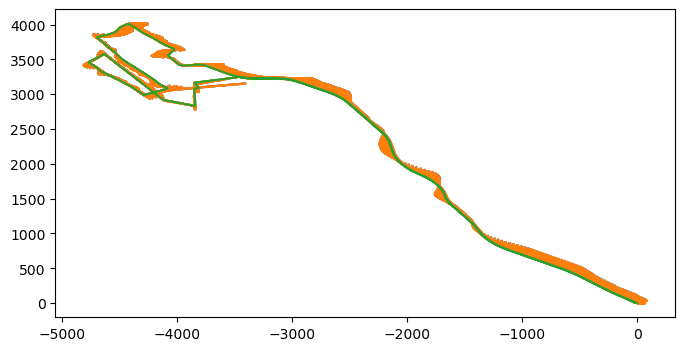

In [69]:
#fig, ax1 = plt.subplots()

x1 = PVS_1_gps_mpu_left_df['pos_x_dashboard_fusion']
x2 = PVS_1_gps_mpu_left_df['pos_x_dashboard_integration']
x3 = PVS_1_gps_mpu_left_df['pos_x_gps_projection_set_zero']


y1= PVS_1_gps_mpu_left_df['pos_y_dashboard_fusion']
y2 = PVS_1_gps_mpu_left_df['pos_y_dashboard_integration']
y3= PVS_1_gps_mpu_left_df['pos_y_gps_projection_set_zero']

plt.figure(figsize=(8, 4))
plt.plot(x1,  y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.show()

In [70]:
Check_positive_pos_x_fusion = PVS_1_gps_mpu_left_df['pos_x_dashboard_fusion'][PVS_1_gps_mpu_left_df['pos_x_dashboard_fusion'] > 0]

In [73]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(PVS_1_gps_mpu_left_df['pos_y_gps_projection_linear'], PVS_1_gps_mpu_left_df['pos_y_dashboard_fusion']))

print(mean_squared_error(PVS_1_gps_mpu_left_df['pos_y_gps_projection_linear'], PVS_1_gps_mpu_left_df['pos_y_dashboard_integration']))

480.0324956988675
485.649092438757


In [74]:
print(mean_squared_error(PVS_1_gps_mpu_left_df['pos_x_gps_projection_linear'], PVS_1_gps_mpu_left_df['pos_x_dashboard_fusion']))

print(mean_squared_error(PVS_1_gps_mpu_left_df['pos_x_gps_projection_linear'], PVS_1_gps_mpu_left_df['pos_x_dashboard_integration']))

2647.524372728343
2602.537452691788


In [76]:
Std_pos_y_dashboard_fusion_df = PVS_1_gps_mpu_left_df['pos_y_gps_projection_linear'] - PVS_1_gps_mpu_left_df['pos_y_dashboard_fusion']
print(np.std(Std_pos_y_dashboard_fusion_df))

Std_pos_y_dashboard_integration_df = PVS_1_gps_mpu_left_df['pos_y_gps_projection_linear'] - PVS_1_gps_mpu_left_df['pos_y_dashboard_integration']
print(np.std(Std_pos_y_dashboard_integration_df))

21.782340989733715
21.92289335055756


In [77]:
Std_pos_x_dashboard_fusion_df = PVS_1_gps_mpu_left_df['pos_x_gps_projection_linear'] - PVS_1_gps_mpu_left_df['pos_x_dashboard_fusion']
print(np.std(Std_pos_x_dashboard_fusion_df))

Std_pos_x_dashboard_integration_df = PVS_1_gps_mpu_left_df['pos_x_gps_projection_linear'] - PVS_1_gps_mpu_left_df['pos_x_dashboard_integration']
print(np.std(Std_pos_x_dashboard_integration_df))

48.12405935085119
47.980364203587484
